In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
url = 'https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/diabetes.csv'#memberikan link dataset dari kaggle yang telah diupload di github
df = pd.read_csv(url) #membuat variabel untuk menyimpan dataset
df.head()#menampilkan 5 data teratas dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()#pengecekan data null

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
print(df.info())#menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
df.describe()#menampilkan deskripsi kolom dari dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


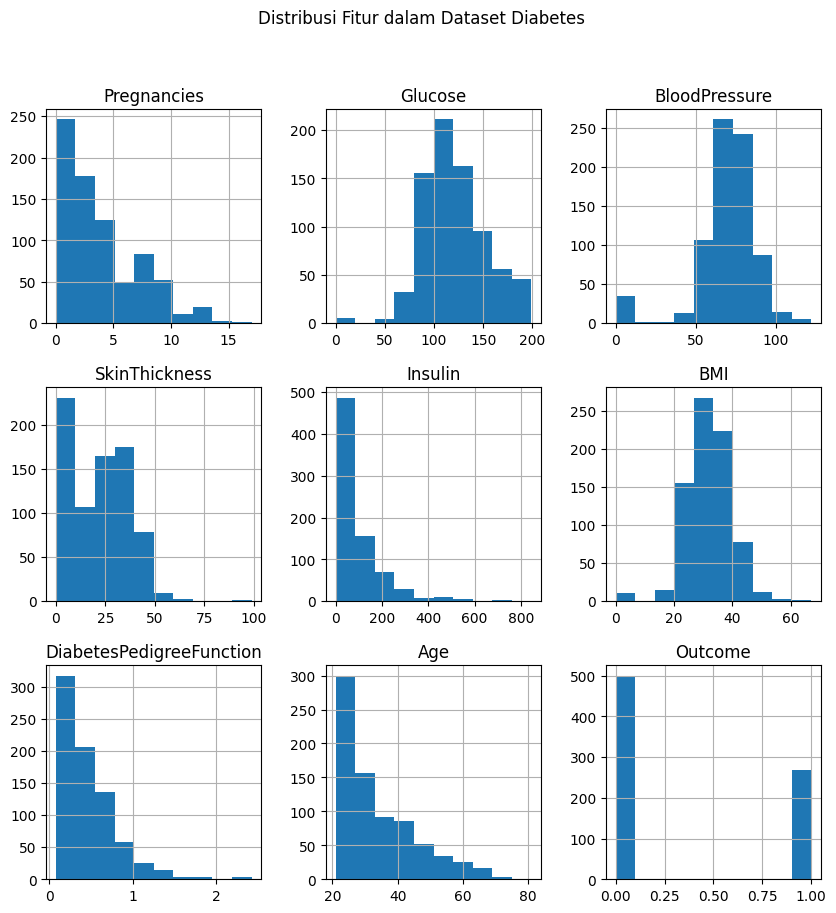

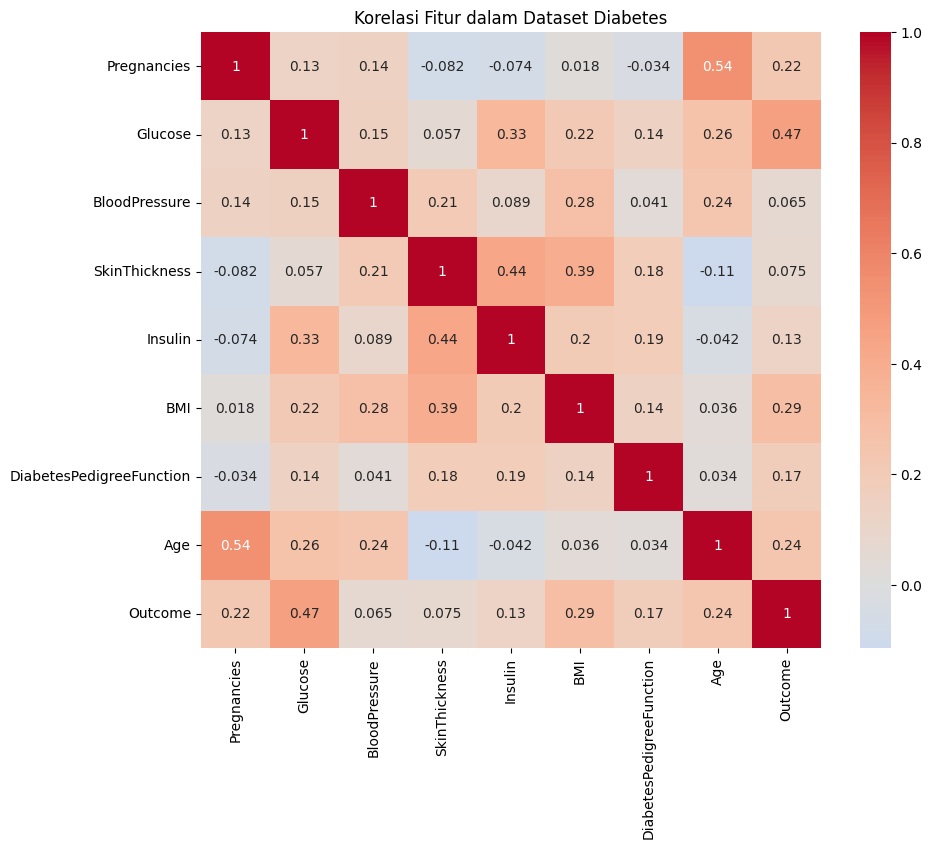

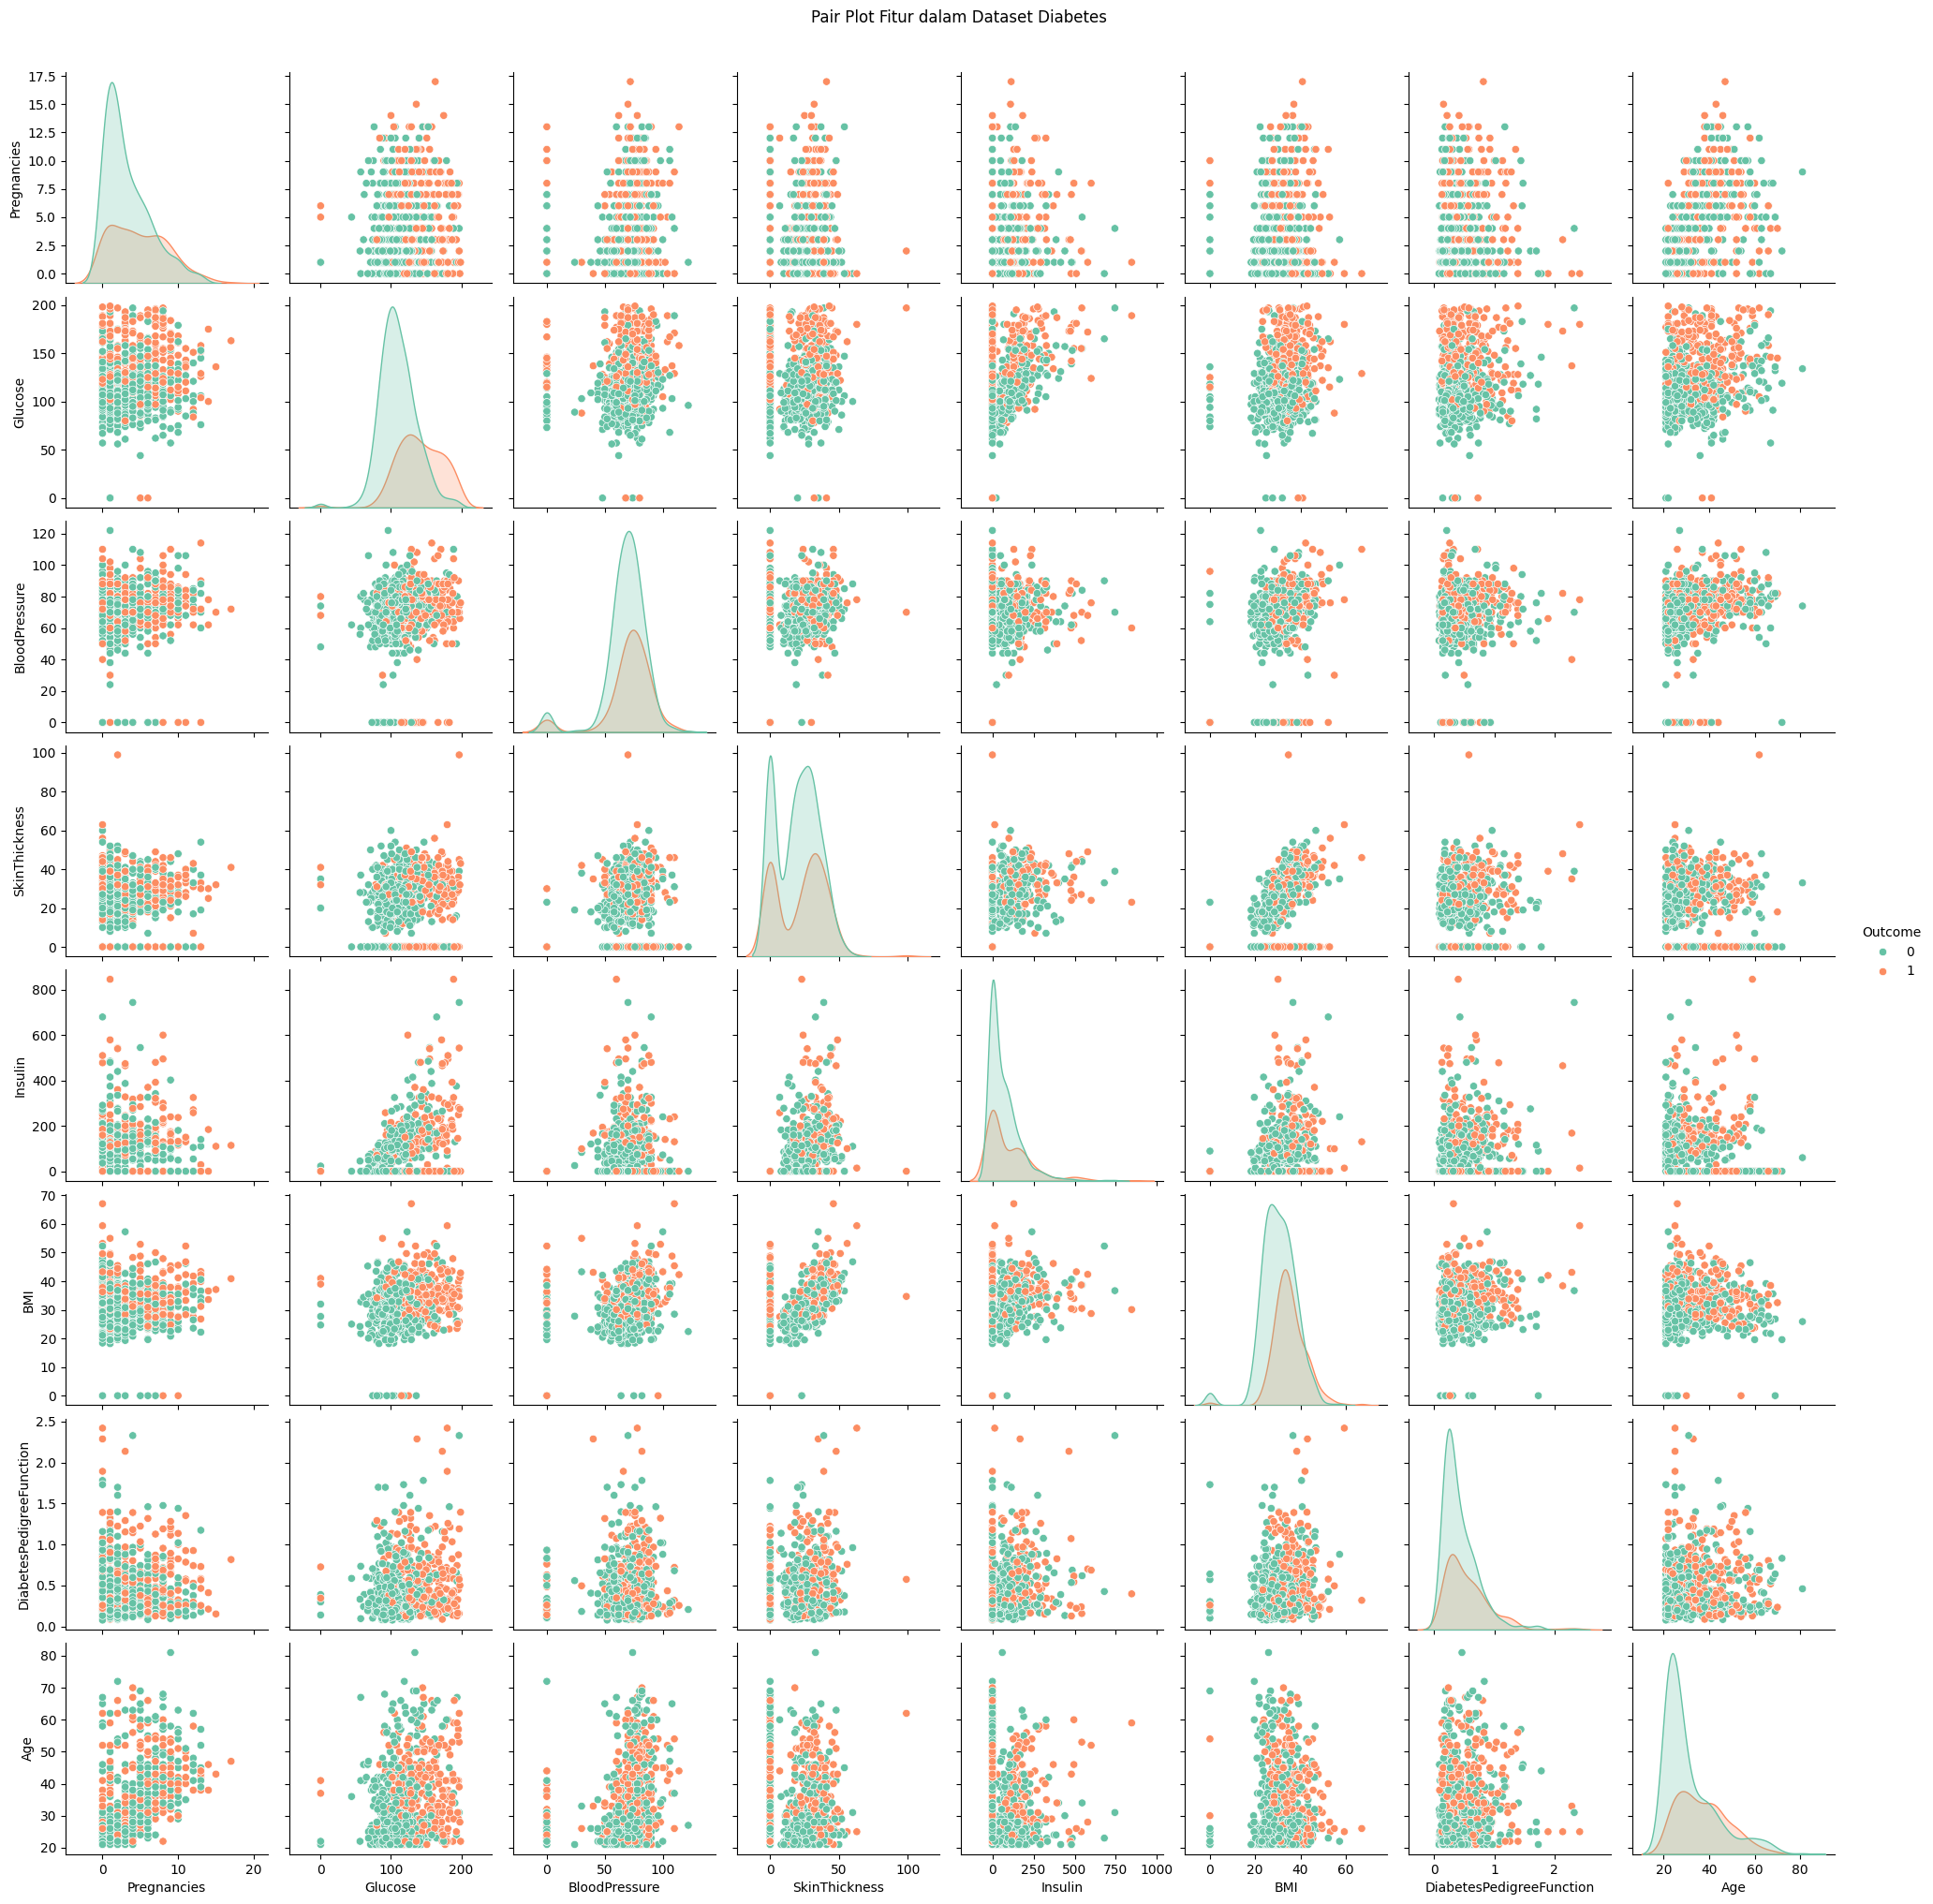

In [34]:
# Membuat Histogram untuk masing-masing kolom
df.hist(bins=10, figsize=(10, 10))
plt.suptitle('Distribusi Fitur dalam Dataset Diabetes')
plt.show()

# Membuat Heatmap untuk melihat korelasi antar-fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Fitur dalam Dataset Diabetes')
plt.show()

# Membuat Pair Plot untuk melihat hubungan berpasangan antara fitur, berdasarkan Outcome
sns.pairplot(df, hue='Outcome', palette='Set2')
plt.suptitle('Pair Plot Fitur dalam Dataset Diabetes', y=1.02)
plt.show()

In [9]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
#membuat variabel untuk menampung kolom dari dataset
#kolom x untuk semua kolom dataset kecuali outcome
#kolom y untuk kolom outcome

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#Digunakan untuk mengsplit data dengan ukuran 20 persen untuk test dan 80 untuk train

In [11]:
X_train.shape, X_test.shape
#menunjukkan jumlah kolom dan baris

((614, 8), (154, 8))

In [12]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_en.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria entropi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [13]:
y_pred_en = dt_en.predict(X_test)
#memprediksi x_test menggunakan kriteria entropi

In [14]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#melihat keakurasian dari pemodelan dengan kriteria entropi

Model accuracy score with criterion entropy: 0.7662


In [15]:
y_train_pred = dt_en.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_en.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.7752
Test accuracy: 0.7662
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

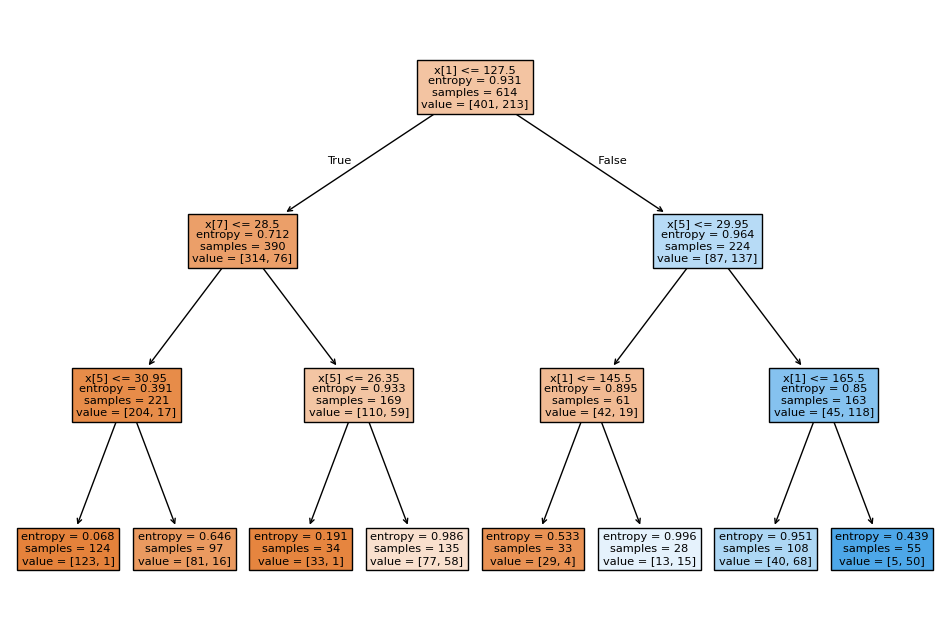

In [16]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria entropi dengan library matplotlib

In [17]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt_gini.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = dt_gini.predict(X_test)
#memprediksi x_test menggunakan kriteria gini

In [19]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#melihat keakurasian dari pemodelan dengan kriteria gini

Model accuracy score with criterion gini: 0.7597


In [20]:
y_train_pred = dt_gini.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_gini.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.7769
Test accuracy: 0.7597
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

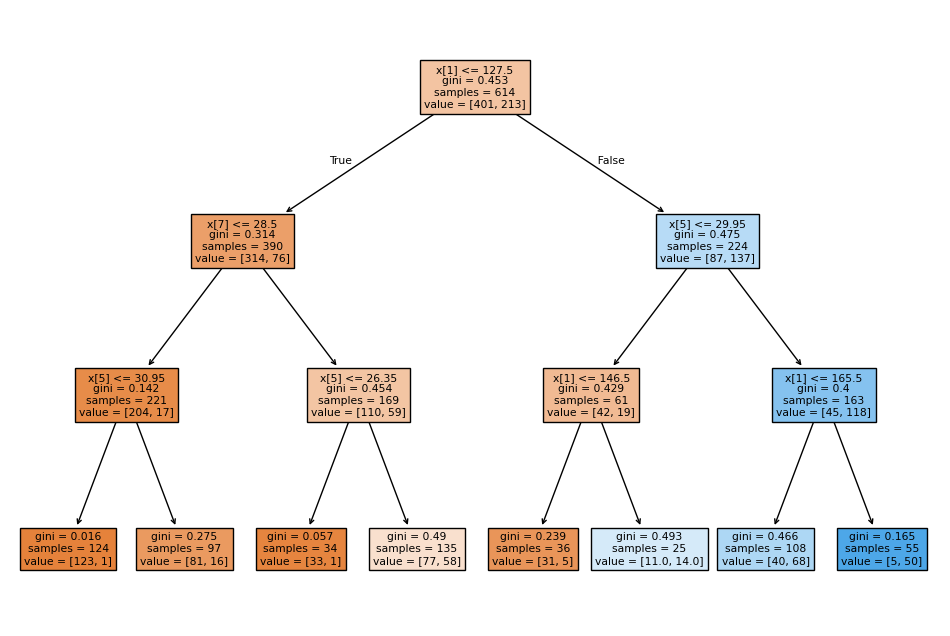

In [21]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria gini dengan library matplotlib

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix for Entropy-based Tree:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix for Gini-based Tree:\n", cm)

print(classification_report(y_test, y_pred_en))
print(classification_report(y_test, y_pred_gini))
#confusion matrix berdasarkan decision tree kriteria entropi dan gini

Confusion Matrix for Entropy-based Tree:
 [[83 16]
 [20 35]]
Confusion Matrix for Gini-based Tree:
 [[83 16]
 [21 34]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# Model lebih efektif dalam mengklasifikasikan kasus non-diabetes (Class 0), dengan f1-score mencapai 0.82.
# Pada kasus diabetes (Class 1), f1-score lebih rendah yaitu 0.66, menandakan performa yang kurang optimal dalam mendeteksi kasus diabetes.
# Akurasi keseluruhan dengan metode Entropy adalah 0.77, sedikit lebih baik daripada Gini Index yang menghasilkan akurasi 0.76.
# Hasil ini menunjukkan bahwa Entropy lebih cocok digunakan untuk dataset ini.

In [24]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Modelling denga menggunakan Gaussian Bayes Classifier.

GaussianNB()

In [25]:
nb_y_pred = nb_classifier.predict(X_test)
#memprediksi x_test menggunakan kriteria gaussian

In [26]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
#confusion matrix berdasarkan naive bayes

Confusion Matrix for Naive Bayes:
 [[79 20]
 [16 39]]


In [27]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
# print score keakurasiannya

Accuracy Score: 0.7662


In [28]:
print(classification_report(y_test, nb_y_pred))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan dengan menggunakan logistic regression

LogisticRegression(max_iter=200)

In [30]:
y_pred_log = classifier.predict(X_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat pelatihan untuk memprediksi data x_test dan membuat komparasi untuk menunjukkan tabel aktual dan tabel prediksi

     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [31]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
# print score keakurasiannya

Accuracy Score: 0.7468


In [32]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#confusion matrix

Confusion Matrix:
 [[78 21]
 [18 37]]


In [33]:
print(classification_report(y_test, y_pred_log))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

